In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [49]:
cvm2_Ys_pre = 0.07
cvm2_Ys_post = 0.14
cvm2_HOC = 20

In [50]:
A39_gases = pd.read_csv("data\\A39_gases.csv", sep=" ", header=None, names=["material","HT","YCO2","YCO","Ych","Ys","Hch","Hcon","Hrad"],na_values="–")
A39_liquids = pd.read_csv("data\\A39_liquids.csv", sep=" ", header=None, names=["material","HT","YCO2","YCO","Ych","Ys","Hch","Hcon","Hrad"],na_values="–")
A39_naturals = pd.read_csv("data\\A39_naturals.csv", sep=" ", header=None, names=["material","HT","YCO2","YCO","Ych","Ys","Hch","Hcon","Hrad"],na_values="–")
A39_synthetics = pd.read_csv("data\\A39_synthetics.csv", sep=" ", header=None, names=["material","HT","YCO2","YCO","Ych","Ys","Hch","Hcon","Hrad"],na_values="–")
A39_foams = pd.read_csv("data\\A39_foams.csv", sep=" ", header=None, names=["material","HT","YCO2","YCO","Ych","Ys","Hch","Hcon","Hrad"],na_values="–")
A39_halogen = pd.read_csv("data\\A39_halogen.csv", sep=" ", header=None, names=["material","HT","YCO2","YCO","Ych","Ys","Hch","Hcon","Hrad"],na_values="–")

A39_foams_mean = pd.DataFrame({
    "material": ["PUR foam flexible (mean)","PUR foam rigid (mean)","PS foam (mean)","PE foam (mean)"],
    "HT": [25.30000,26.75000,37.37500,40.90000],
    "YCO2": [1.53250,1.56500,2.32000,2.62750],
    "YCO": [0.02775,0.02950,0.06075,0.02025],
    "Ych": [0.00400,0.00175,0.01450,0.00525],
    "Ys": [0.18750,0.11800,0.19375,0.07625],
    "Hch": [17.55000,16.92500,25.50000,34.22500],
    "Hcon": [8.42500,7.60000,10.72500,19.52500],
    "Hrad": [9.12500,9.35000,14.77500,14.70000]
})

A39_gases["Ys*"] = 1000*A39_gases["Ys"]/A39_gases["Hch"]
A39_liquids["Ys*"] = 1000*A39_liquids["Ys"]/A39_liquids["Hch"]
A39_naturals["Ys*"] = 1000*A39_naturals["Ys"]/A39_naturals["Hch"]
A39_synthetics["Ys*"] = 1000*A39_synthetics["Ys"]/A39_synthetics["Hch"]
A39_halogen["Ys*"] = 1000*A39_halogen["Ys"]/A39_halogen["Hch"]
A39_foams["Ys*"] = 1000*A39_foams["Ys"]/A39_foams["Hch"]
A39_foams_mean["Ys*"] = 1000*A39_foams_mean["Ys"]/A39_foams_mean["Hch"]

A39_gases["Xr"] = A39_gases["Hrad"]/A39_gases["Hch"]
A39_liquids["Xr"] = A39_liquids["Hrad"]/A39_liquids["Hch"]
A39_naturals["Xr"] = A39_naturals["Hrad"]/A39_naturals["Hch"]
A39_synthetics["Xr"] = A39_synthetics["Hrad"]/A39_synthetics["Hch"]
A39_halogen["Xr"] = A39_halogen["Hrad"]/A39_halogen["Hch"]
A39_foams["Xr"] = A39_foams["Hrad"]/A39_foams["Hch"]
A39_foams_mean["Xr"] = A39_foams_mean["Hrad"]/A39_foams_mean["Hch"]

A39_all = pd.concat([A39_foams_mean,A39_gases,A39_liquids,A39_naturals,A39_synthetics],ignore_index=True)

A39_all["Ys"].dropna(inplace=True)
A39_all_incl_halogen = pd.concat([A39_all,A39_halogen],ignore_index=True)

In [51]:
representants = A39_all_incl_halogen[(A39_all_incl_halogen['material'] == 'Wood(redoak)')]
representants = pd.concat([representants, A39_foams_mean[(A39_foams_mean['material'] == 'PE foam (mean)')]])
representants = pd.concat([representants, A39_all_incl_halogen[(A39_all_incl_halogen['material'] == 'PS')]])
representants = pd.concat([representants, A39_all_incl_halogen[(A39_all_incl_halogen['material'] == 'PVC')]])
representants = pd.concat([representants, A39_all_incl_halogen[(A39_all_incl_halogen['material'] == 'PUR foam rigid (mean)')]])
representants = representants.reset_index(drop=True)

representants

,material,HT,YCO2,YCO,Ych,Ys,Hch,Hcon,Hrad,Ys*,Xr
0,Wood(redoak),17.10,1.2700,0.00400,0.00100,0.01500,12.400,7.800,4.60,1.209677,0.370968
1,PE foam (mean),40.90,2.6275,0.02025,0.00525,0.07625,34.225,19.525,14.70,2.227904,0.429511
2,PS,39.20,2.3300,0.06000,0.01400,0.16400,27.000,11.000,16.00,6.074074,0.592593
3,PVC,16.40,0.4600,0.06300,0.02300,0.17200,5.700,3.100,2.60,30.175439,0.456140
4,PUR foam rigid (mean),26.75,1.5650,0.02950,0.00175,0.11800,16.925,7.600,9.35,6.971935,0.552437


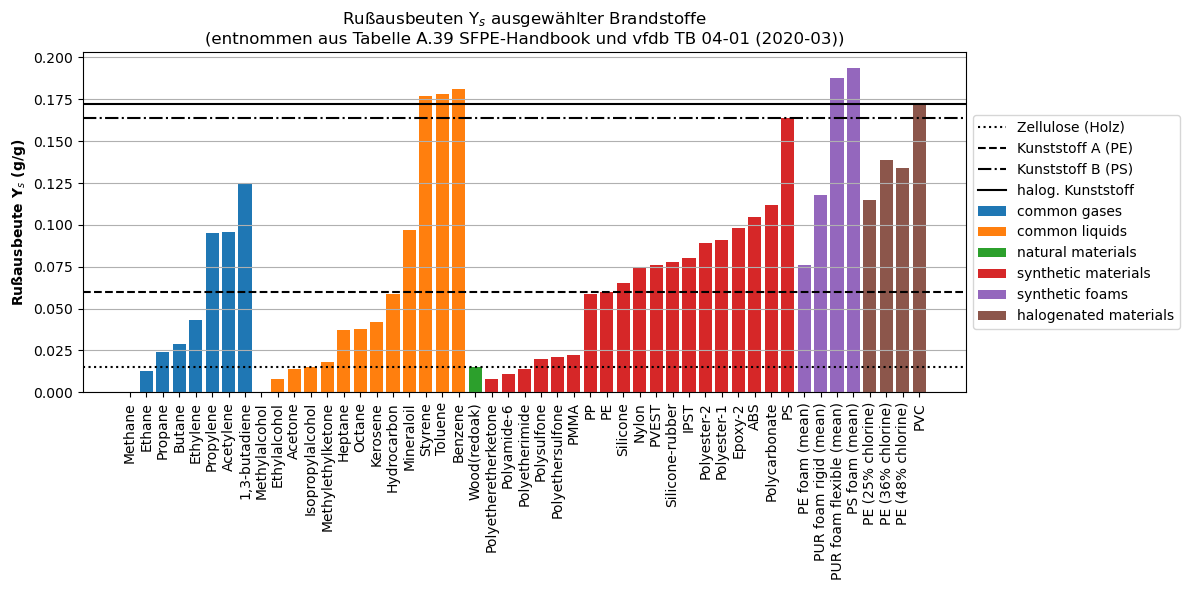

In [52]:
A39_gases = A39_gases.sort_values(by=["Ys"])
A39_liquids = A39_liquids.sort_values(by=["Ys"])
A39_naturals = A39_naturals.sort_values(by=["Ys"])
A39_synthetics = A39_synthetics.sort_values(by=["Ys"])
A39_foams_mean = A39_foams_mean.sort_values(by=["Ys"])

plt.figure(figsize=(12,6))
plt.bar(A39_gases["material"],A39_gases["Ys"],label="common gases")
plt.bar(A39_liquids["material"],A39_liquids["Ys"],label="common liquids")
plt.bar(A39_naturals["material"],A39_naturals["Ys"],label="natural materials")
plt.bar(A39_synthetics["material"],A39_synthetics["Ys"],label="synthetic materials")
plt.bar(A39_foams_mean["material"],A39_foams_mean["Ys"],label="synthetic foams")
plt.bar(A39_halogen["material"],A39_halogen["Ys"],label="halogenated materials")

plt.axhline(A39_all["Ys"].iloc[25],c='black',linestyle='dotted',label="Zellulose (Holz)")
plt.axhline(A39_all["Ys"].iloc[28],c='black',linestyle='dashed',label="Kunststoff A (PE)")
plt.axhline(A39_all["Ys"].iloc[30],c='black',linestyle='dashdot',label="Kunststoff B (PS)")
plt.axhline(A39_halogen["Ys"].iloc[3],c='black',label="halog. Kunststoff")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis="y")
plt.ylabel(r"Rußausbeute Y$_s$ (g/g)", fontweight="bold")
plt.xticks(rotation=90, ha='center')

plt.title("Rußausbeuten Y$_s$ ausgewählter Brandstoffe\n(entnommen aus Tabelle A.39 SFPE-Handbook und vfdb TB 04-01 (2020-03))")
plt.tight_layout()
plt.savefig("images\\A39+vfdb2020_Ys.svg")
plt.savefig("images\\A39+vfdb2020_Ys.png",dpi=300)

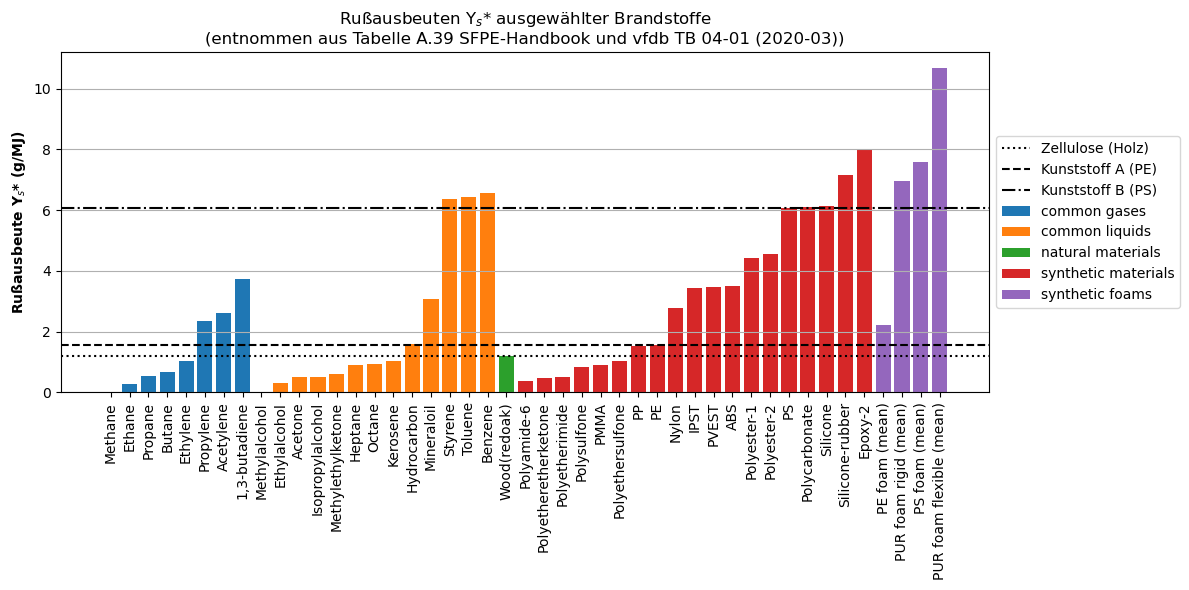

In [53]:
A39_gases = A39_gases.sort_values(by=["Ys*"])
A39_liquids = A39_liquids.sort_values(by=["Ys*"])
A39_naturals = A39_naturals.sort_values(by=["Ys*"])
A39_synthetics = A39_synthetics.sort_values(by=["Ys*"])
A39_foams_mean = A39_foams_mean.sort_values(by=["Ys*"])

plt.figure(figsize=(12,6))
plt.bar(A39_gases["material"],A39_gases["Ys*"],label="common gases")
plt.bar(A39_liquids["material"],A39_liquids["Ys*"],label="common liquids")
plt.bar(A39_naturals["material"],A39_naturals["Ys*"],label="natural materials")
plt.bar(A39_synthetics["material"],A39_synthetics["Ys*"],label="synthetic materials")
plt.bar(A39_foams_mean["material"],A39_foams_mean["Ys*"],label="synthetic foams")
#plt.bar(A39_halogen["material"],A39_halogen["Ys*"],label="halogenated materials")

plt.axhline(A39_all["Ys*"].iloc[25],c='black',linestyle='dotted',label="Zellulose (Holz)")
plt.axhline(A39_all["Ys*"].iloc[28],c='black',linestyle='dashed',label="Kunststoff A (PE)")
plt.axhline(A39_all["Ys*"].iloc[30],c='black',linestyle='dashdot',label="Kunststoff B (PS)")
#plt.axhline(A39_halogen["Ys*"].iloc[3],c='black',label="halog. Kunststoff")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis="y")
plt.ylabel(r"Rußausbeute Y$_s$* (g/MJ)", fontweight="bold")
plt.xticks(rotation=90, ha='center')

plt.title("Rußausbeuten Y$_s$* ausgewählter Brandstoffe\n(entnommen aus Tabelle A.39 SFPE-Handbook und vfdb TB 04-01 (2020-03))")
plt.tight_layout()
plt.savefig("images\\A39+vfdb2020_Ys+.svg")
plt.savefig("images\\A39+vfdb2020_Ys+.png",dpi=300)

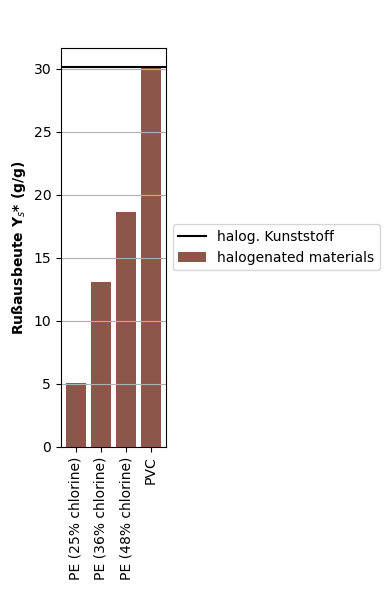

In [54]:
plt.figure(figsize=(4,6))

plt.bar(A39_halogen["material"],A39_halogen["Ys*"],label="halogenated materials",color="C5")

plt.axhline(A39_halogen["Ys*"].iloc[3],c='black',label="halog. Kunststoff")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis="y")
plt.ylabel(r"Rußausbeute Y$_s$* (g/g)", fontweight="bold")
plt.xticks(rotation=90, ha='center')

plt.title("\n")
plt.tight_layout()
plt.savefig("images\\A39+vfdb2020_Ys+_hal.svg")
plt.savefig("images\\A39+vfdb2020_Ys+_hal.png",dpi=300)

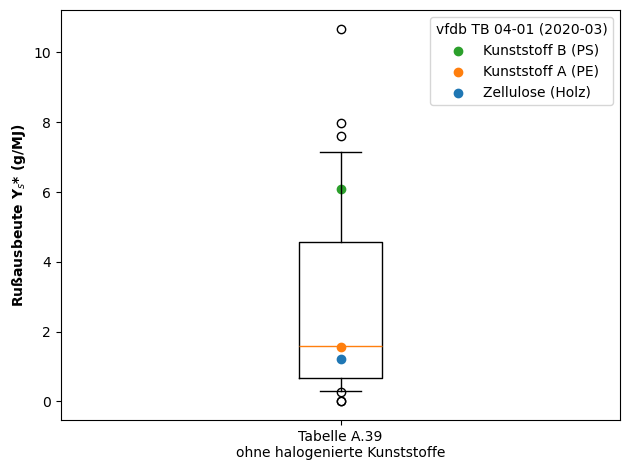

In [55]:
plt.boxplot([A39_all["Ys*"]],whis=(5, 95),labels=["Tabelle A.39\nohne halogenierte Kunststoffe"])

plt.scatter(1,A39_all["Ys*"].iloc[25],label="Zellulose (Holz)")
plt.scatter(1,A39_all["Ys*"].iloc[28],label="Kunststoff A (PE)")
plt.scatter(1,A39_all["Ys*"].iloc[30],label="Kunststoff B (PS)")
plt.ylabel(r"Rußausbeute Y$_s$* (g/MJ)", fontweight="bold")
plt.legend(reverse=True,title="vfdb TB 04-01 (2020-03)")
plt.tight_layout()
plt.savefig("images\\boxplot_Ys+_alt.svg")
plt.savefig("images\\boxplot_Ys+_alt.png",dpi=300)

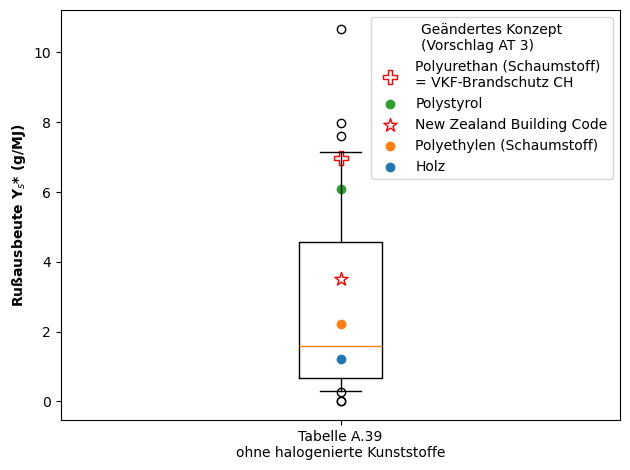

In [56]:
plt.boxplot([A39_all["Ys*"]],whis=(5, 95),labels=["Tabelle A.39\nohne halogenierte Kunststoffe"])

plt.scatter(1,representants.loc[0,"Ys*"],label="Holz")
plt.scatter(1,representants.loc[1,"Ys*"],label="Polyethylen (Schaumstoff)")
plt.scatter(1,1000*cvm2_Ys_pre/cvm2_HOC,label="New Zealand Building Code",marker="*",s=100,edgecolor="red",c="white")
plt.scatter(1,representants.loc[2,"Ys*"],label="Polystyrol")
plt.scatter(1,representants.loc[4,"Ys*"],label="Polyurethan (Schaumstoff)\n= VKF-Brandschutz CH",marker="P",s=100,edgecolor="red",c="white")

plt.ylabel(r"Rußausbeute Y$_s$* (g/MJ)", fontweight="bold")
plt.legend(reverse=True,title="Geändertes Konzept\n(Vorschlag AT 3)")

plt.tight_layout()
plt.savefig("images\\boxplot_Ys+_neu.svg")
plt.savefig("images\\boxplot_Ys+_neu.svg")

In [57]:
def calc_Hch_vc(Phi,Hch_wv):
    """Equation 36.44"""
    Hch_vc = Hch_wv * (1 - 0.97 / np.exp((Phi/2.15)**-1.2))
    return Hch_vc

def calc_YCO2_vc(Phi,YCO2_wc):
    """Equation 36.69"""
    YCO2_vc = YCO2_wc * (1 - 0.97 / np.exp((Phi/2.15)**-1.2))
    return YCO2_vc

def calc_YCO_vc(Phi,alpha,xi,YCO_wc):
    """Equation 36.70"""
    YCO_vc = YCO_wc * (1 + alpha / np.exp(2.5*Phi**-xi))
    return YCO_vc

def calc_Ys_vc(Phi,alpha,xi,Ys_wc):
    """Equation 36.72"""
    Ys_vc = Ys_wc * (1 + alpha / np.exp(2.5*Phi**-xi))
    return Ys_vc

In [58]:
params = pd.read_csv("data\\Table_36_12.txt",sep=" ")
params

,Material,CO_a,CO_b,CO_z,HC_a,HC_b,HC_z,Smoke_a,Smoke_b,Smoke_z
0,PS,2,1.44,2.5,25,2.45,1.8,2.80,2.02,1.3
1,PP,10,1.39,2.8,220,1.90,2.5,2.20,2.50,1.0
2,PE,26,1.39,2.8,220,1.90,2.5,2.20,2.50,1.0
3,Nylon,36,1.36,3.0,1200,1.65,3.2,1.70,3.14,0.8
4,PMMA,43,1.33,3.2,1800,1.58,3.5,1.60,4.61,0.6
5,Wood,44,1.30,3.5,200,2.33,1.9,2.50,2.15,1.2
6,PVC,7,0.42,8.0,25,0.42,1.8,0.38,2.02,8.0


In [59]:
phi = 2
params_locs = [5,2,0,6]

for i in range(4):
    representants.loc[i,"YHCN"] = 0
    representants.loc[i,"Hch_vc"] = calc_YCO2_vc(phi,representants.loc[i,"Hch"]).round(2)
    representants.loc[i,"YCO2_vc"] = calc_YCO2_vc(phi,representants.loc[i,"YCO2"]).round(2)
    representants.loc[i,"YCO_vc"] = calc_YCO_vc(phi,params.loc[params_locs[i],"CO_a"],params.loc[params_locs[i],"CO_z"],representants.loc[i,"YCO"]).round(3)
    representants.loc[i,"Ys_vc"] = calc_Ys_vc(phi,params.loc[params_locs[i],"Smoke_a"],params.loc[params_locs[i],"Smoke_z"],representants.loc[i,"Ys"]).round(3)
    representants.loc[i,"YHCN_vc"] = 0

representants.loc[4,"Hch_vc"] = 8.86
representants.loc[4,"YCO2_vc"] = 0.17
representants.loc[4,"Ys_vc"] = representants.loc[4,"Ys"] * 2
representants.loc[4,"YCO_vc"] = representants.loc[4,"YCO"] * 20
representants.loc[4,"YHCN"] = representants.loc[4,"YCO"] / 12.5
representants.loc[4,"YHCN_vc"] = representants.loc[4,"YCO_vc"] / 12.5

representants

,material,HT,YCO2,YCO,Ych,Ys,Hch,Hcon,Hrad,Ys*,Xr,YHCN,Hch_vc,YCO2_vc,YCO_vc,Ys_vc,YHCN_vc
0,Wood(redoak),17.10,1.2700,0.00400,0.00100,0.01500,12.400,7.800,4.60,1.209677,0.370968,0.00000,8.36,0.86,0.145,0.028,0.0000
1,PE foam (mean),40.90,2.6275,0.02025,0.00525,0.07625,34.225,19.525,14.70,2.227904,0.429511,0.00000,23.07,1.77,0.388,0.124,0.0000
2,PS,39.20,2.3300,0.06000,0.01400,0.16400,27.000,11.000,16.00,6.074074,0.592593,0.00000,18.20,1.57,0.137,0.330,0.0000
3,PVC,16.40,0.4600,0.06300,0.02300,0.17200,5.700,3.100,2.60,30.175439,0.456140,0.00000,3.84,0.31,0.500,0.237,0.0000
4,PUR foam rigid (mean),26.75,1.5650,0.02950,0.00175,0.11800,16.925,7.600,9.35,6.971935,0.552437,0.00236,8.86,0.17,0.590,0.236,0.0472


In [60]:
representants.loc[0,"C"] = 6
representants.loc[0,"H"] = 10
representants.loc[0,"O"] = 6
representants.loc[0,"N"] = 0

representants.loc[1,"C"] = 2
representants.loc[1,"H"] = 4
representants.loc[1,"O"] = 0
representants.loc[1,"N"] = 0

representants.loc[2,"C"] = 8
representants.loc[2,"H"] = 8
representants.loc[2,"O"] = 0
representants.loc[2,"N"] = 0

representants.loc[3,"C"] = 2
representants.loc[3,"H"] = 3
representants.loc[3,"O"] = 0
representants.loc[3,"N"] = 0
representants.loc[3,"Cl"] = 1

representants.loc[4,"C"] = 6.3
representants.loc[4,"H"] = 7.1
representants.loc[4,"O"] = 2.1
representants.loc[4,"N"] = 1

representants

,material,HT,YCO2,YCO,Ych,Ys,Hch,Hcon,Hrad,Ys*,...,Hch_vc,YCO2_vc,YCO_vc,Ys_vc,YHCN_vc,C,H,O,N,Cl
0,Wood(redoak),17.10,1.2700,0.00400,0.00100,0.01500,12.400,7.800,4.60,1.209677,...,8.36,0.86,0.145,0.028,0.0000,6.0,10.0,6.0,0.0,NaN
1,PE foam (mean),40.90,2.6275,0.02025,0.00525,0.07625,34.225,19.525,14.70,2.227904,...,23.07,1.77,0.388,0.124,0.0000,2.0,4.0,0.0,0.0,NaN
2,PS,39.20,2.3300,0.06000,0.01400,0.16400,27.000,11.000,16.00,6.074074,...,18.20,1.57,0.137,0.330,0.0000,8.0,8.0,0.0,0.0,NaN
3,PVC,16.40,0.4600,0.06300,0.02300,0.17200,5.700,3.100,2.60,30.175439,...,3.84,0.31,0.500,0.237,0.0000,2.0,3.0,0.0,0.0,1.0
4,PUR foam rigid (mean),26.75,1.5650,0.02950,0.00175,0.11800,16.925,7.600,9.35,6.971935,...,8.86,0.17,0.590,0.236,0.0472,6.3,7.1,2.1,1.0,NaN


In [61]:
import numpy as np
from scipy.optimize import minimize
from sympy import symbols, Eq, solve

def berechne_stoechiometrie_mit_heizwert(x, y, z, v, y_CO, y_Soot, y_HCN, X_H, EPUMO2=13.1, Hu=None):
    # Überprüfen, ob die Koeffizienten gültig sind
    assert x >= 0 and y >= 0 and z >= 0, "Die Koeffizienten x, y und z müssen positive Werte sein."

    # Molar masses in g/mol
    W_CO = 28.01       # CO
    W_CO2 = 44.01      # CO2
    W_H = 1.008        # Wasserstoff
    W_C = 12.01        # Kohlenstoff
    W_HCN = 27.03      # HCN
    W_O2 = 32.00       # Sauerstoff
    W_H2O = 18.015     # Wasser
    W_F = x * W_C + y * W_H + z * 16 + v * 14  # Molare Masse des Brennstoffs in g/mol
    
    # Überprüfen, ob W_F nicht null ist
    if W_F == 0:
        raise ValueError("Die molare Masse des Brennstoffs (W_F) darf nicht null sein.")
    
    W_Soot = X_H * W_H + (1 - X_H) * W_C       # Molare Masse von Ruß

    # Stoffmengenverhältnisse berechnen
    nu_CO = (W_F / W_CO) * y_CO
    nu_Soot = (W_F / W_Soot) * y_Soot
    nu_HCN = (W_F / W_HCN) * y_HCN
    nu_N2 = v / 2 - nu_HCN

    # Unbekannte Koeffizienten
    nu_CO2, nu_H2O, nu_O2 = symbols('nu_CO2 nu_H2O nu_O2')

    # Bilanzgleichungen aufstellen
    eq1 = Eq(nu_CO2, x - nu_CO - nu_HCN - (1 - X_H) * nu_Soot)   # Kohlenstoffbilanz
    eq2 = Eq(nu_H2O, y / 2 - (X_H / 2) * nu_Soot - nu_HCN / 2)    # Wasserstoffbilanz
    eq3 = Eq(nu_O2, nu_CO2 + nu_CO / 2 + nu_H2O / 2 - z / 2)      # Sauerstoffbilanz

    # Lösen des Gleichungssystems
    result = solve([eq1, eq2, eq3], (nu_CO2, nu_H2O, nu_O2))
    
    if not result:
        raise ValueError("Die Gleichungen haben keine Lösung. Überprüfen Sie die Eingabewerte.")
    
    nu_CO2_val, nu_H2O_val, nu_O2_val = result[nu_CO2], result[nu_H2O], result[nu_O2]

    # Heizwert berechnen
    if EPUMO2 is None and Hu is None:
        raise ValueError("Entweder EPUMO2 oder Hu muss angegeben werden, um den Heizwert zu berechnen.")

    if EPUMO2 is not None:
        mol_O2_pro_kg = nu_O2_val * (1000 / W_F)  # mol O2 pro kg Brennstoff
        masse_O2_pro_kg = mol_O2_pro_kg * W_O2 / 1000  # Masse O2 in kg pro kg Brennstoff
        heizwert = masse_O2_pro_kg * EPUMO2  # Heizwert in MJ pro kg Brennstoff
    elif Hu is not None:
        masse_O2_pro_kg = Hu / (W_F * EPUMO2)  # Formel zur Berechnung von EPUMO2
        EPUMO2 = Hu / masse_O2_pro_kg
        heizwert = Hu  # Heizwert basierend auf Hu

    # Ausbeuten berechnen
    Y_CO2 = nu_CO2_val * W_CO2 / W_F  # Masseanteil CO2 pro kg Brennstoff
    Y_H2O = nu_H2O_val * W_H2O / W_F  # Masseanteil H2O pro kg Brennstoff

    return heizwert, EPUMO2, Y_CO2, Y_H2O

def optimierungsfunktion(params, y_CO, y_Soot, y_HCN, X_H, targets):
    """
    Optimierungsfunktion, die den Fehler zwischen berechneten und Zielwerten minimiert.
    """
    # Eingabewerte aus den Optimierungsparametern extrahieren
    x, y, z, v = params

    # Zielwerte
    target_heizwert, target_EPUMO2, target_Y_CO2, target_Y_H2O = targets

    # Berechne die Werte mit der gegebenen Funktion
    heizwert, EPUMO2, Y_CO2, Y_H2O = berechne_stoechiometrie_mit_heizwert(x, y, z, v, y_CO, y_Soot, y_HCN, X_H, EPUMO2=13.1, Hu=None)

    # Fehler berechnen (Summe der Fehlerquadrate)
    error_1 = (heizwert - target_heizwert)**2 + (EPUMO2 - target_EPUMO2)**2 + (Y_CO2 - target_Y_CO2)**2 + (Y_H2O - target_Y_H2O)**2
    error_2 = (start_params[0] - x)**2 + (start_params[1] - y)**2 + (start_params[2] - z)**2 + (start_params[3] - v)**2
    
    error = error_1 + 0.5*error_2
    
    return error

def create_fds_file(filename, chid, fuel, formula, heat_of_combustion, soot_yield, co_yield, hcn_yield):
    # Dateiinhalt mit den Platzhaltern
    content = f"""
&HEAD CHID='{chid}' /
&TIME T_END=1 /
&MESH IJK=3,3,3, XB=0,1,0,1,0,1 /
&REAC FUEL='{fuel}', FORMULA="{formula}", HEAT_OF_COMBUSTION={heat_of_combustion}, SOOT_YIELD={soot_yield}, CO_YIELD={co_yield}, HCN_YIELD={hcn_yield} /
    """
    
    # Datei erstellen und Inhalt schreiben
    with open(f"FDS\\Validate_EPUMO2\\{filename}", 'w') as f:
        f.write(content.strip())
    print(f"Datei '{filename}' wurde erfolgreich erstellt.")

In [62]:
for i in [0,1,2,4]:

    y_CO2 = representants.loc[i,f"YCO2"]
    y_CO = representants.loc[i,f"YCO"]
    y_Soot = representants.loc[i,f"Ys"]
    y_HCN = representants.loc[i,f"YHCN"]
    X_H = 0

    Hch = representants.loc[i,f"Hch"]

    C = representants.loc[i,"C"]
    H = representants.loc[i,"H"]
    O = representants.loc[i,"O"]
    N = representants.loc[i,"N"]

    start_params = [C, H, O, N]

    starter = berechne_stoechiometrie_mit_heizwert(C, H, O, N, y_CO, y_Soot, y_HCN, X_H, EPUMO2=13.1, Hu=Hch)

    y_H2O = starter[-1]
    
    targets = (Hch, 13.1, y_CO2, y_H2O)  # Zielwerte für Heizwert, EPUMO2, Y_CO2, Y_H2O

    # Beschränkungen für die Parameter (x, y, z, v müssen alle >= 0 sein)
    if y_HCN == 0:
        bound_HCN = 0
    else:
        bound_HCN = None
        
    bounds = [(0, None), (0, None), (0, None), (0, bound_HCN)]

    # Minimierung der Fehlerfunktion
    result = minimize(optimierungsfunktion, start_params, args=(y_CO, y_Soot, y_HCN, X_H, targets), bounds=bounds, method='Nelder-Mead')
    
    # Optimierte Parameter
    print(representants.loc[i,"material"])

    optimierte_params = result.x
    print(f"Optimierte Parameter: x={optimierte_params[0]}, y={optimierte_params[1]}, z={optimierte_params[2]}, v={optimierte_params[3]}")

    representants.loc[i,"Summenformel"] = f"C{optimierte_params[0].round(1)}H{optimierte_params[1].round(1)}O{optimierte_params[2].round(1)}N{optimierte_params[3].round(1)}"
    
    # Berechnen der optimierten Werte (Heizwert, EPUMO2, Y_CO2, Y_H2O)
    heizwert, EPUMO2, Y_CO2, Y_H2O = berechne_stoechiometrie_mit_heizwert(optimierte_params[0].round(1), optimierte_params[1].round(1), optimierte_params[2].round(1), optimierte_params[3].round(1), y_CO, y_Soot, y_HCN, X_H, EPUMO2=13.1, Hu=None)

    representants.loc[i,f"Hch*"] = heizwert.round(3)
    representants.loc[i,f"YCO2*"] = Y_CO2.round(3)

    # Ausgabe der optimierten Werte
    print(f"Optimierter Heizwert: {heizwert:.2f} MJ/kg (Fehler: {heizwert/Hch-1})")
    print(f"Optimierter EPUMO2: {EPUMO2:.2f} MJ/kg O2")
    print(f"Optimierter Y_CO2: {Y_CO2:.4f} (Fehler: {Y_CO2/y_CO2-1})")
    print(f"Optimierter Y_H2O: {Y_H2O:.4f} (Fehler: {Y_H2O/y_H2O-1})")
    print()

    hch_vc = berechne_stoechiometrie_mit_heizwert(optimierte_params[0].round(1), optimierte_params[1].round(1), optimierte_params[2].round(1), optimierte_params[3].round(1), representants.loc[i,f"YCO_vc"], representants.loc[i,f"Ys_vc"], representants.loc[i,f"YHCN_vc"], X_H, EPUMO2=13.1, Hu=None)
    print(f"Ermittlung Hch für vc: {hch_vc}")
    representants.loc[i,f"Hch**_vc"] = hch_vc[0].round(3)
    print()

    formula = f"C{optimierte_params[0].round(1)}H{optimierte_params[1].round(1)}O{optimierte_params[2].round(1)}N{optimierte_params[3].round(1)}"
    create_fds_file(f"validate_{str(i)}_wv.fds", f"validate_{str(i)}", representants.loc[i,"material"], formula, Hch*1000, y_Soot, y_CO, y_HCN)
    create_fds_file(f"validate_{str(i)}_vc.fds", f"validate_{str(i)}_vc", representants.loc[i,"material"], formula, representants.loc[i,f"Hch**_vc"]*1000, representants.loc[i,f"Ys_vc"], representants.loc[i,f"YCO_vc"], representants.loc[i,f"YHCN_vc"])
    print()

Wood(redoak)
Optimierte Parameter: x=5.9855316720165685, y=10.01263034414395, z=5.9932348645050855, v=0.0
Optimierter Heizwert: 12.39 MJ/kg (Fehler: -0.000876328337890975)
Optimierter EPUMO2: 13.10 MJ/kg O2
Optimierter Y_CO2: 1.4211 (Fehler: 0.118949358955138)
Optimierter Y_H2O: 0.5056 (Fehler: 0)

Ermittlung Hch für vc: (10.8802694349312, 13.1, 1.15188522070669, 0.505641630178511)

Datei 'validate_0_wv.fds' wurde erfolgreich erstellt.
Datei 'validate_0_vc.fds' wurde erfolgreich erstellt.

PE foam (mean)
Optimierte Parameter: x=2.02359065966783, y=3.969858014543857, z=0.26837733765878263, v=0.0
Optimierter Heizwert: 33.55 MJ/kg (Fehler: -0.0196127019885478)
Optimierter EPUMO2: 13.10 MJ/kg O2
Optimierter Y_CO2: 2.3681 (Fehler: -0.0987411589678853)
Optimierter Y_H2O: 1.0967 (Fehler: -0.146109825885791)

Ermittlung Hch für vc: (29.1351888947054, 13.1, 1.61526246132054, 1.09673688055522)

Datei 'validate_1_wv.fds' wurde erfolgreich erstellt.
Datei 'validate_1_vc.fds' wurde erfolgreich erst

In [63]:
df = representants

df = df.drop(columns=["HT","YCO2","YCO2_vc","Ych","Hcon","Hrad","C","H","O","N","Cl","Hch_vc","Hch*","YCO2*","Xr","Ys*"])

new_names = ["0_Material","4_Y_CO_wv","3_Y_s_wv","2_H_ch_wv","5_Y_HCN_wv","8_Y_CO_vc","7_Y_s_vc","9_Y_HCN_vc","1_Summenformel","6_H_ch_vc"]

for i, column in enumerate(df.columns):
    df.rename(columns={column: new_names[i]}, inplace=True)

df = df.sort_index(axis=1)
df

,0_Material,1_Summenformel,2_H_ch_wv,3_Y_s_wv,4_Y_CO_wv,5_Y_HCN_wv,6_H_ch_vc,7_Y_s_vc,8_Y_CO_vc,9_Y_HCN_vc
0,Wood(redoak),C6.0H10.0O6.0N0.0,12.400,0.01500,0.00400,0.00000,10.880,0.028,0.145,0.0000
1,PE foam (mean),C2.0H4.0O0.3N0.0,34.225,0.07625,0.02025,0.00000,29.135,0.124,0.388,0.0000
2,PS,C8.0H7.9O1.0N0.0,27.000,0.16400,0.06000,0.00000,20.544,0.330,0.137,0.0000
3,PVC,NaN,5.700,0.17200,0.06300,0.00000,NaN,0.237,0.500,0.0000
4,PUR foam rigid (mean),C6.2H7.1O2.3N1.1,16.925,0.11800,0.02950,0.00236,7.813,0.236,0.590,0.0472


In [64]:
import os
import re

def find_epumo2_values(directory):
    """
    Durchsucht alle .out-Dateien im angegebenen Verzeichnis nach der Zeile mit 'EPUMO2:'
    und gibt den zugehörigen Zahlenwert aus.
    """
    # Überprüft, ob das Verzeichnis existiert
    if not os.path.isdir(directory):
        print(f"Das angegebene Verzeichnis '{directory}' existiert nicht.")
        return

    # Alle .out-Dateien im Verzeichnis durchgehen
    for filename in os.listdir(directory):
        if filename.endswith(".out"):
            filepath = os.path.join(directory, filename)

            with open(filepath, 'r') as file:
                for line in file:
                    # Nach Zeile mit 'EPUMO2:' suchen
                    if 'EPUMO2:' in line:
                        # Extrahiere den Zahlenwert nach 'EPUMO2:'
                        match = re.search(r'EPUMO2:\s*([+-]?\d*\.\d+([eE][+-]?\d+)?)', line)
                        if match:
                            print(f"Datei: {filename} - EPUMO2-Wert: {match.group(1)}")
                        break

# Beispielaufruf der Funktion mit einem Verzeichnis
find_epumo2_values(r'C:\Rauchausbeuten\GitHub\FDS\Validate_EPUMO2')

Datei: validate_0.out - EPUMO2-Wert: 13111.9493
Datei: validate_0_vc.out - EPUMO2-Wert: 13100.0936
Datei: validate_1.out - EPUMO2-Wert: 13362.9374
Datei: validate_1_vc.out - EPUMO2-Wert: 13100.7760
Datei: validate_2.out - EPUMO2-Wert: 13142.7278
Datei: validate_2_vc.out - EPUMO2-Wert: 13100.9559
Datei: validate_4.out - EPUMO2-Wert: 13047.7569
Datei: validate_4_vc.out - EPUMO2-Wert: 13103.3396


In [65]:
A40 = pd.read_csv("data\\A40.csv", sep=" ", header=None, names=["Fuel","Formula","Lsp","M","S","HT","Hch","Hcon","Hrad","YCO","Ys"],na_values="–")
A40["Ys*"] = 1000*A40["Ys"]/A40["Hch"]
A40.head()

,Fuel,Formula,Lsp,M,S,HT,Hch,Hcon,Hrad,YCO,Ys,Ys*
0,Normal alkanes,C2H6,0.243,30,16.0,47.1,47.0,37.4,9.6,0.001,0.002,0.042553
1,Normal alkanes,C3H8,0.162,44,15.6,46.0,44.1,31.6,12.5,0.005,0.019,0.430839
2,Normal alkanes,C4H10,0.160,58,15.4,45.4,43.5,31.0,12.4,0.005,0.020,0.459770
3,Normal alkanes,C5H12,0.155,72,15.3,45.0,42.3,29.3,13.1,0.006,0.022,0.520095
4,Normal alkanes,C6H14,0.125,86,15.2,44.8,41.7,28.2,13.4,0.009,0.031,0.743405


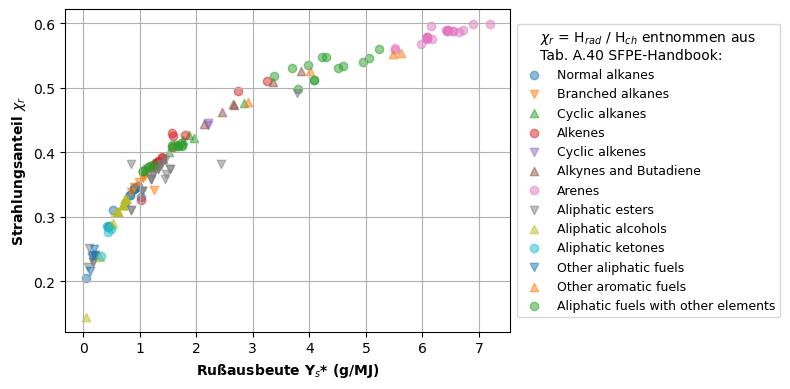

In [66]:
A40["Ys*"] = 1000*A40["Ys"]/A40["Hch"]
fuels = A40["Fuel"].drop_duplicates().to_list()
marker = ["o","v","^","o","v","^","o","v","^","o","v","^","o","v","^","o","v","^"]

plt.figure(figsize=(8,4))

for fuel in range(len(fuels)):
    plt.scatter(A40["Ys*"].where(A40["Fuel"] == fuels[fuel]),A40["Hrad"].where(A40["Fuel"] == fuels[fuel])/A40["Hch"].where(A40["Fuel"] == fuels[fuel]),label=fuels[fuel],marker=marker[fuel],alpha=0.5)

plt.legend(fontsize=9, title="$\\chi_r$ = H$_{rad}$ / H$_{ch}$ entnommen aus\nTab. A.40 SFPE-Handbook:", loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid()
plt.xlabel(r"Rußausbeute Y$_s$* (g/MJ)", fontweight='bold')
plt.ylabel(r"Strahlungsanteil $\chi_r$", fontweight='bold')

plt.tight_layout()

plt.savefig("images\\RadFrac.svg")
plt.savefig("images\\RadFrac.png",dpi=300)